In [1]:
import pandas as pd

# Load the second row as header
df22 = pd.read_excel("../data/raw/survey_results.xlsx", 
                     sheet_name="2022Anonymised Transformed Data", 
                     header=1)

df23 = pd.read_excel("../data/raw/survey_results.xlsx", 
                     sheet_name="2023Anonymised Transformed Data", 
                     header=1)

In [19]:
cols_of_interest = [
    "Physical Health", "Psychological Health",
    "Positive Wellbeing", "Sense Of Purpose",
    "SW_Positive Emotions", "SW_Sense of Purpose",
    "GDAW_Energy", "GDAW_Achievement", "GDAW_Social", "GDAW_Contribution", "GDAW_Overall",
    "Engagement", "Resilience"
]

# Subset the DataFrames based on available columns
df22_subset = df22[[col for col in cols_of_interest if col in df22.columns]]
df23_subset = df23[[col for col in cols_of_interest if col in df23.columns]]

# Convert all fields to numeric
df22_clean = df22_subset.apply(pd.to_numeric, errors='coerce')
df23_clean = df23_subset.apply(pd.to_numeric, errors='coerce')

# Identify GDAW fields to scale
gdaw_cols = [col for col in df22_clean.columns if col.startswith("GDAW_")]

# Scale GDAW fields from 0-5 to 0-100
for col in gdaw_cols:
    df22_clean[col] = df22_clean[col] * 20
    df23_clean[col] = df23_clean[col] * 20

# Calculate averages
avg_2022 = df22_clean.mean()
avg_2023 = df23_clean.mean()

# Compile comparison
comparison_df = pd.DataFrame({
    "2022 Average": avg_2022,
    "2023 Average": avg_2023,
    "Difference (2023 - 2022)": avg_2023 - avg_2022
}).reset_index().rename(columns={"index": "Indicator"})

comparison_df


,Indicator,2022 Average,2023 Average,Difference (2023 - 2022)
0,Physical Health,54.561290,60.093656,5.532365
1,Psychological Health,57.722581,65.102719,7.380138
2,Positive Wellbeing,52.006494,60.199396,8.192902
3,Sense Of Purpose,71.282468,73.924242,2.641775
4,GDAW_Energy,59.613029,78.180000,18.566971
5,GDAW_Achievement,74.630820,82.667069,8.036250
6,GDAW_Social,93.471096,97.381269,3.910173
7,GDAW_Contribution,88.640924,93.896677,5.255753
8,GDAW_Overall,78.754545,88.069486,9.314941


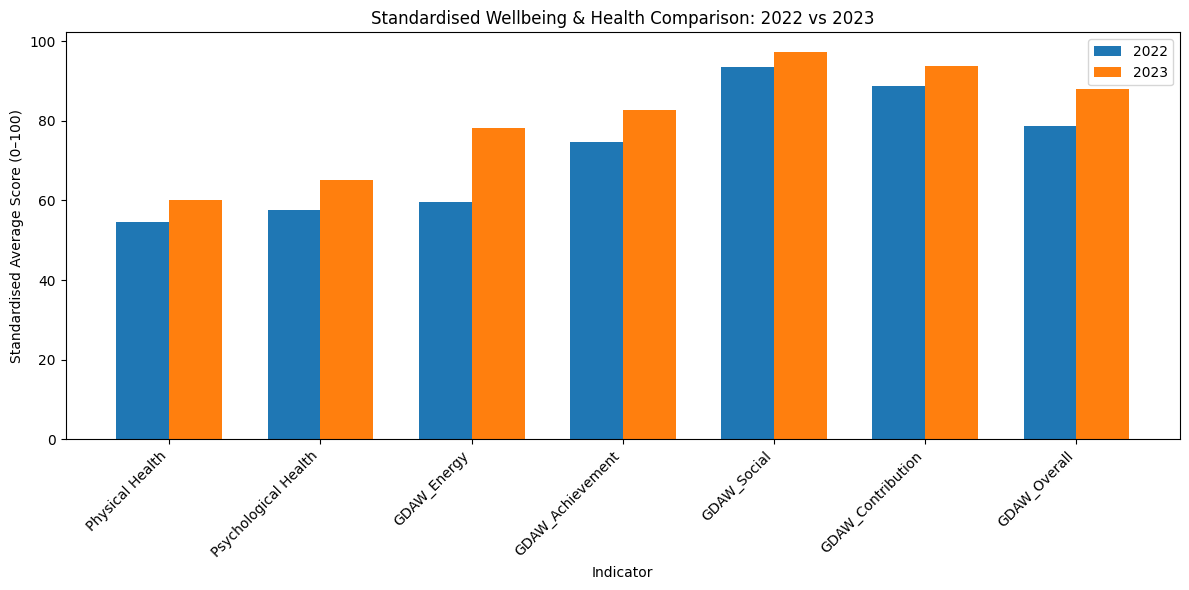

In [15]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
x = comparison_df["Indicator"]
bar_width = 0.35
x_pos = range(len(x))

plt.bar(x_pos, comparison_df["2022 Average"], width=bar_width, label='2022')
plt.bar([p + bar_width for p in x_pos], comparison_df["2023 Average"], width=bar_width, label='2023')

plt.xlabel("Indicator")
plt.ylabel("Standardised Average Score (0–100)")
plt.title("Standardised Wellbeing & Health Comparison: 2022 vs 2023")
plt.xticks([p + bar_width/2 for p in x_pos], x, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
# Display the comparison DataFrame without using acetools
comparison_df.reset_index(inplace=True)
comparison_df.rename(columns={'index': 'Indicator'}, inplace=True)
comparison_df

,Indicator,Indicator,2022 Average,2023 Average,Difference (2023 - 2022)
0,0,Physical Health,54.561290,60.093656,5.532365
1,1,Psychological Health,57.722581,65.102719,7.380138
2,2,GDAW_Energy,59.613029,78.180000,18.566971
3,3,GDAW_Achievement,74.630820,82.667069,8.036250
4,4,GDAW_Social,93.471096,97.381269,3.910173
5,5,GDAW_Contribution,88.640924,93.896677,5.255753
6,6,GDAW_Overall,78.754545,88.069486,9.314941


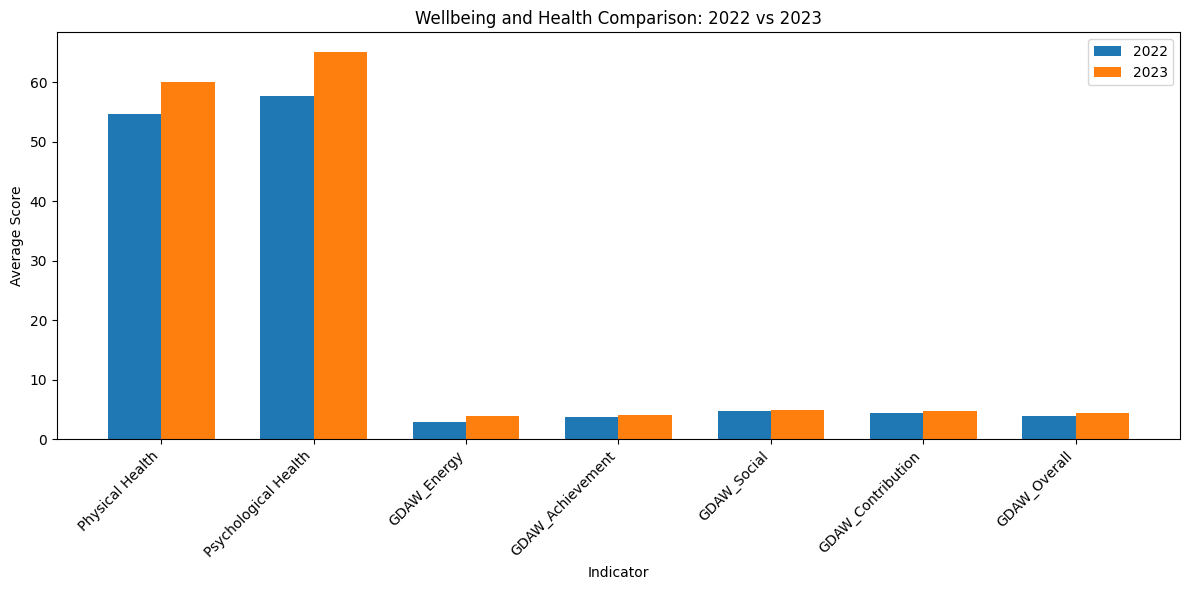

In [ ]:

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the averages for 2022 and 2023
x = comparison_df["Indicator"]
bar_width = 0.35
x_pos = range(len(x))

plt.bar(x_pos, comparison_df["2022 Average"], width=bar_width, label='2022')
plt.bar([p + bar_width for p in x_pos], comparison_df["2023 Average"], width=bar_width, label='2023')

# Label formatting
plt.xlabel("Indicator")
plt.ylabel("Average Score")
plt.title("Wellbeing and Health Comparison: 2022 vs 2023")
plt.xticks([p + bar_width/2 for p in x_pos], x, rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [10]:
comparison_df

,Indicator,2022 Average,2023 Average,Difference (2023 - 2022)
0,Physical Health,54.561290,60.093656,5.532365
1,Psychological Health,57.722581,65.102719,7.380138
2,GDAW_Energy,2.980651,3.909000,0.928349
3,GDAW_Achievement,3.731541,4.133353,0.401812
4,GDAW_Social,4.673555,4.869063,0.195509
5,GDAW_Contribution,4.432046,4.694834,0.262788
6,GDAW_Overall,3.937727,4.403474,0.465747


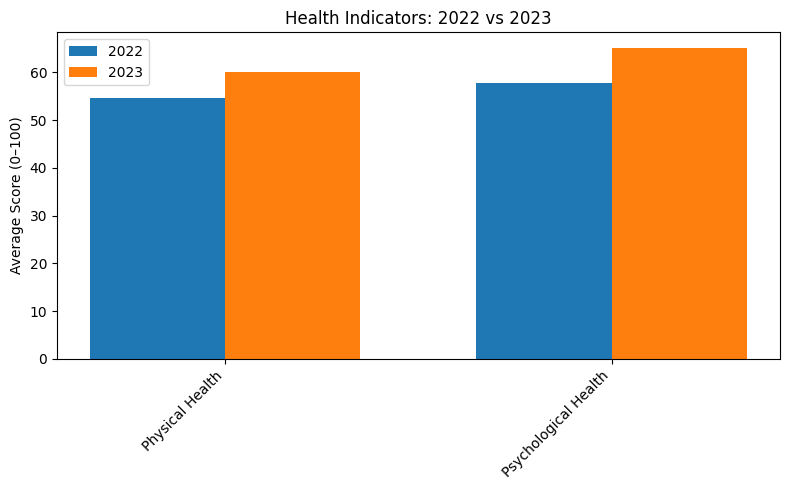

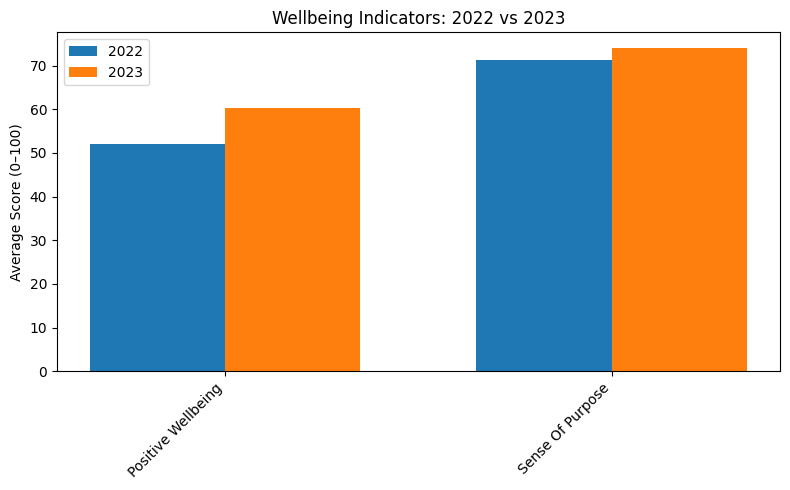

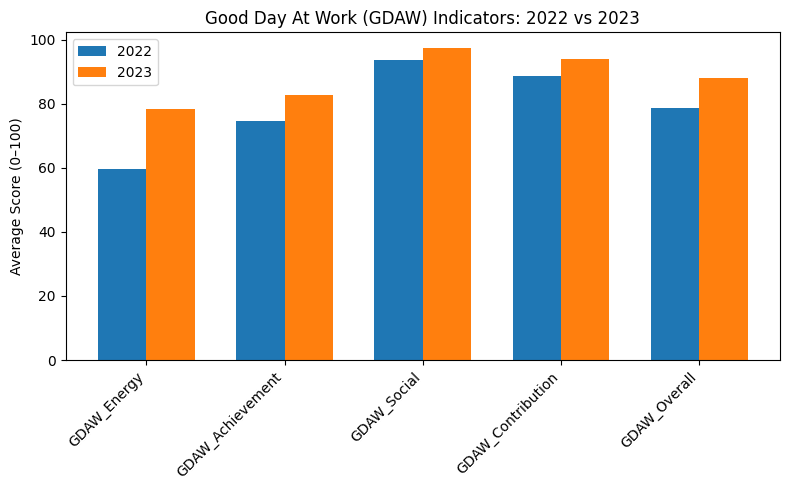

In [20]:
import matplotlib.pyplot as plt

# Group indicators
health_indicators = ["Physical Health", "Psychological Health"]
wellbeing_indicators = ["Positive Wellbeing", "Sense Of Purpose"]
gdaw_indicators = [col for col in comparison_df["Indicator"] if col.startswith("GDAW_")]

# Helper function to plot grouped bar chart
def plot_group(data, indicators, title):
    subset = data[data["Indicator"].isin(indicators)]
    x = subset["Indicator"]
    x_pos = range(len(x))
    bar_width = 0.35

    plt.figure(figsize=(8, 5))
    plt.bar(x_pos, subset["2022 Average"], width=bar_width, label="2022")
    plt.bar([p + bar_width for p in x_pos], subset["2023 Average"], width=bar_width, label="2023")
    plt.xticks([p + bar_width / 2 for p in x_pos], x, rotation=45, ha='right')
    plt.ylabel("Average Score (0–100)")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot each group
plot_group(comparison_df, health_indicators, "Health Indicators: 2022 vs 2023")
plot_group(comparison_df, wellbeing_indicators, "Wellbeing Indicators: 2022 vs 2023")
plot_group(comparison_df, gdaw_indicators, "Good Day At Work (GDAW) Indicators: 2022 vs 2023")
